In [1]:
import pandas as pd 
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [3]:
data.head(5)

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
 data["Years in current job"].value_counts()

Years in current job
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: count, dtype: int64

In [5]:
data["Home Ownership"].value_counts()

Home Ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: count, dtype: int64

In [6]:
mappings = {
    "Years in current job": {
        "10+ years": 10,
        "2 years": 2,
        "3 years": 3,
        "< 1 year": 0,
        "5 years": 5,
        "1 year": 1,
        "4 years": 4,
        "6 years": 6,
        "7 years": 7,
        "8 years": 8,
        "9 years": 9
    },
    "Home Ownership": {
        "Home Mortgage": 0,
        "Rent": 1,
        "Own Home": 2,
        "Have Mortgage": 3
    }
}
data["Years in current job"] = data["Years in current job"].map(mappings["Years in current job"])
data["Home Ownership"] = data["Home Ownership"].map(mappings["Home Ownership"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   int64  
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   float64
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [7]:
data.head()
data.columns

Index(['Id', 'Home Ownership', 'Annual Income', 'Years in current job',
       'Tax Liens', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

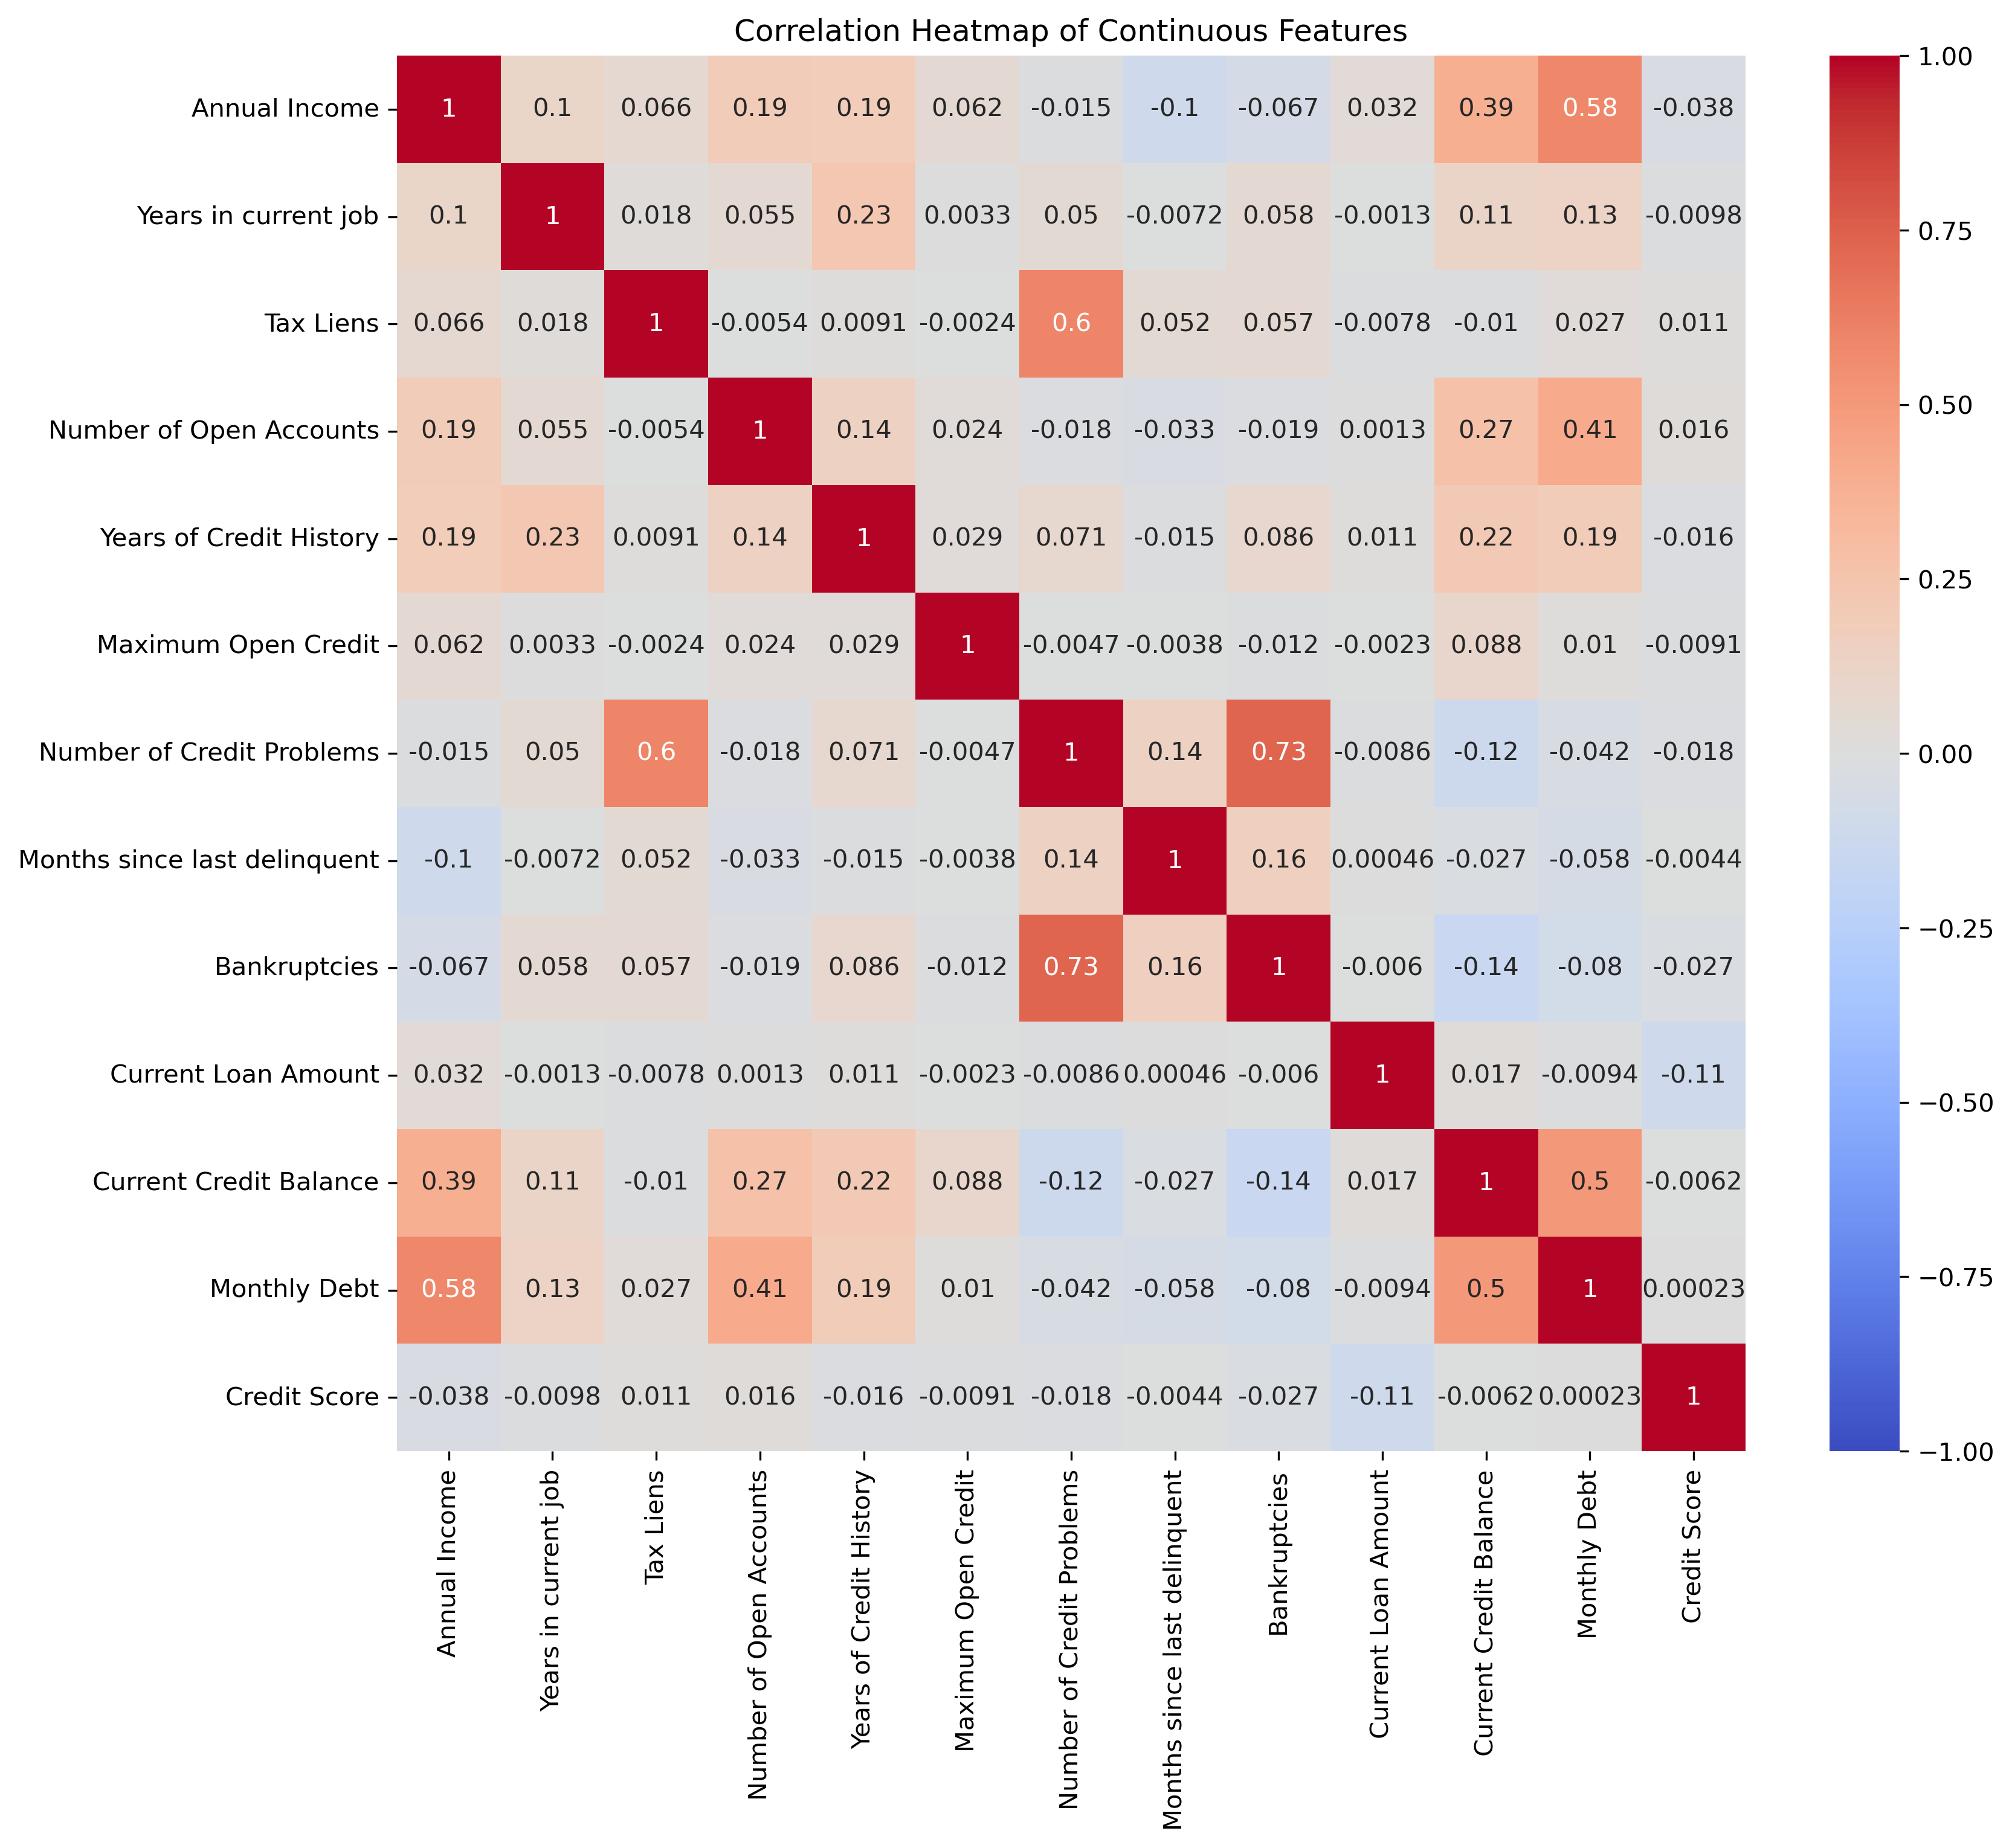

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

continuous_features = [
    'Annual Income', 'Years in current job', 'Tax Liens',
    'Number of Open Accounts', 'Years of Credit History',
    'Maximum Open Credit', 'Number of Credit Problems',
    'Months since last delinquent', 'Bankruptcies',
    'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
    'Credit Score'
]

correlation_matrix = data[continuous_features].corr()

plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

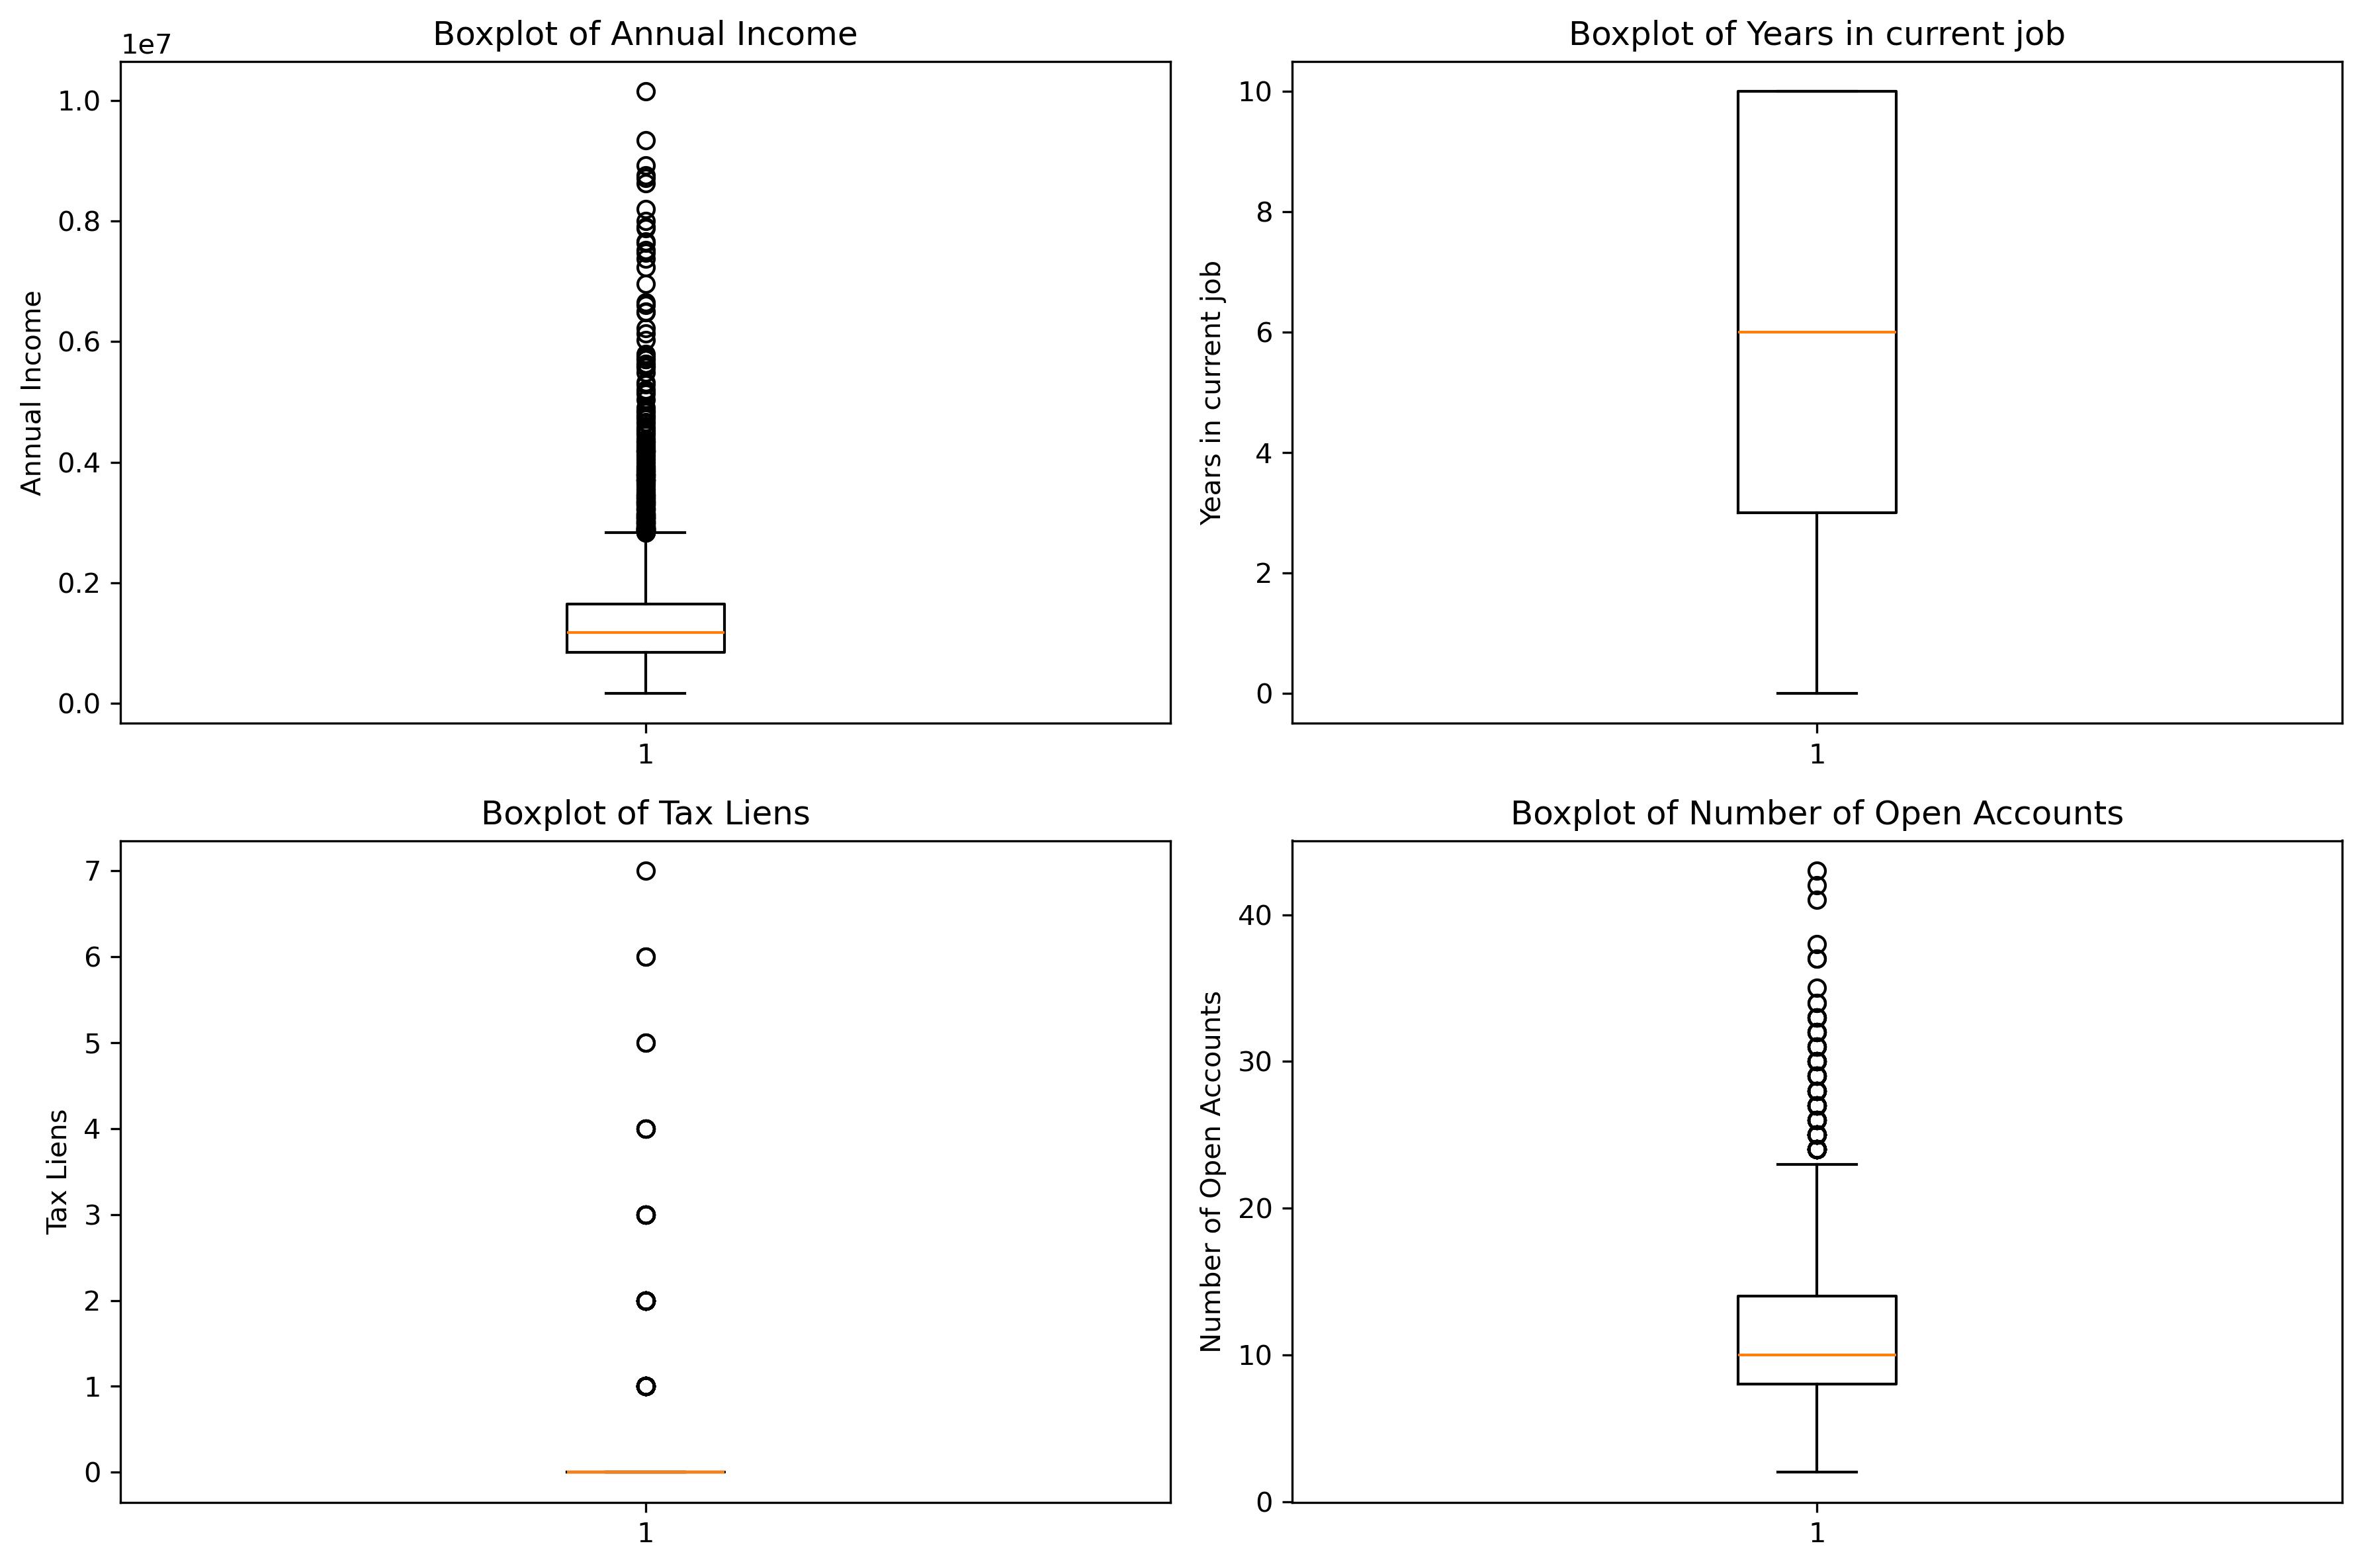

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ['Annual Income', 'Years in current job', 'Tax Liens', 'Number of Open Accounts']



plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

i = 0
feature = features[i]
axes[0, 0].boxplot(data[feature].dropna())
axes[0, 0].set_title(f'Boxplot of {feature}')
axes[0, 0].set_ylabel(feature)

i = 1
feature = features[i]
axes[0, 1].boxplot(data[feature].dropna())
axes[0, 1].set_title(f'Boxplot of {feature}')
axes[0, 1].set_ylabel(feature)

i = 2
feature = features[i]
axes[1, 0].boxplot(data[feature].dropna())
axes[1, 0].set_title(f'Boxplot of {feature}')
axes[1, 0].set_ylabel(feature)

i = 3
feature = features[i]
axes[1, 1].boxplot(data[feature].dropna())
axes[1, 1].set_title(f'Boxplot of {feature}')
axes[1, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

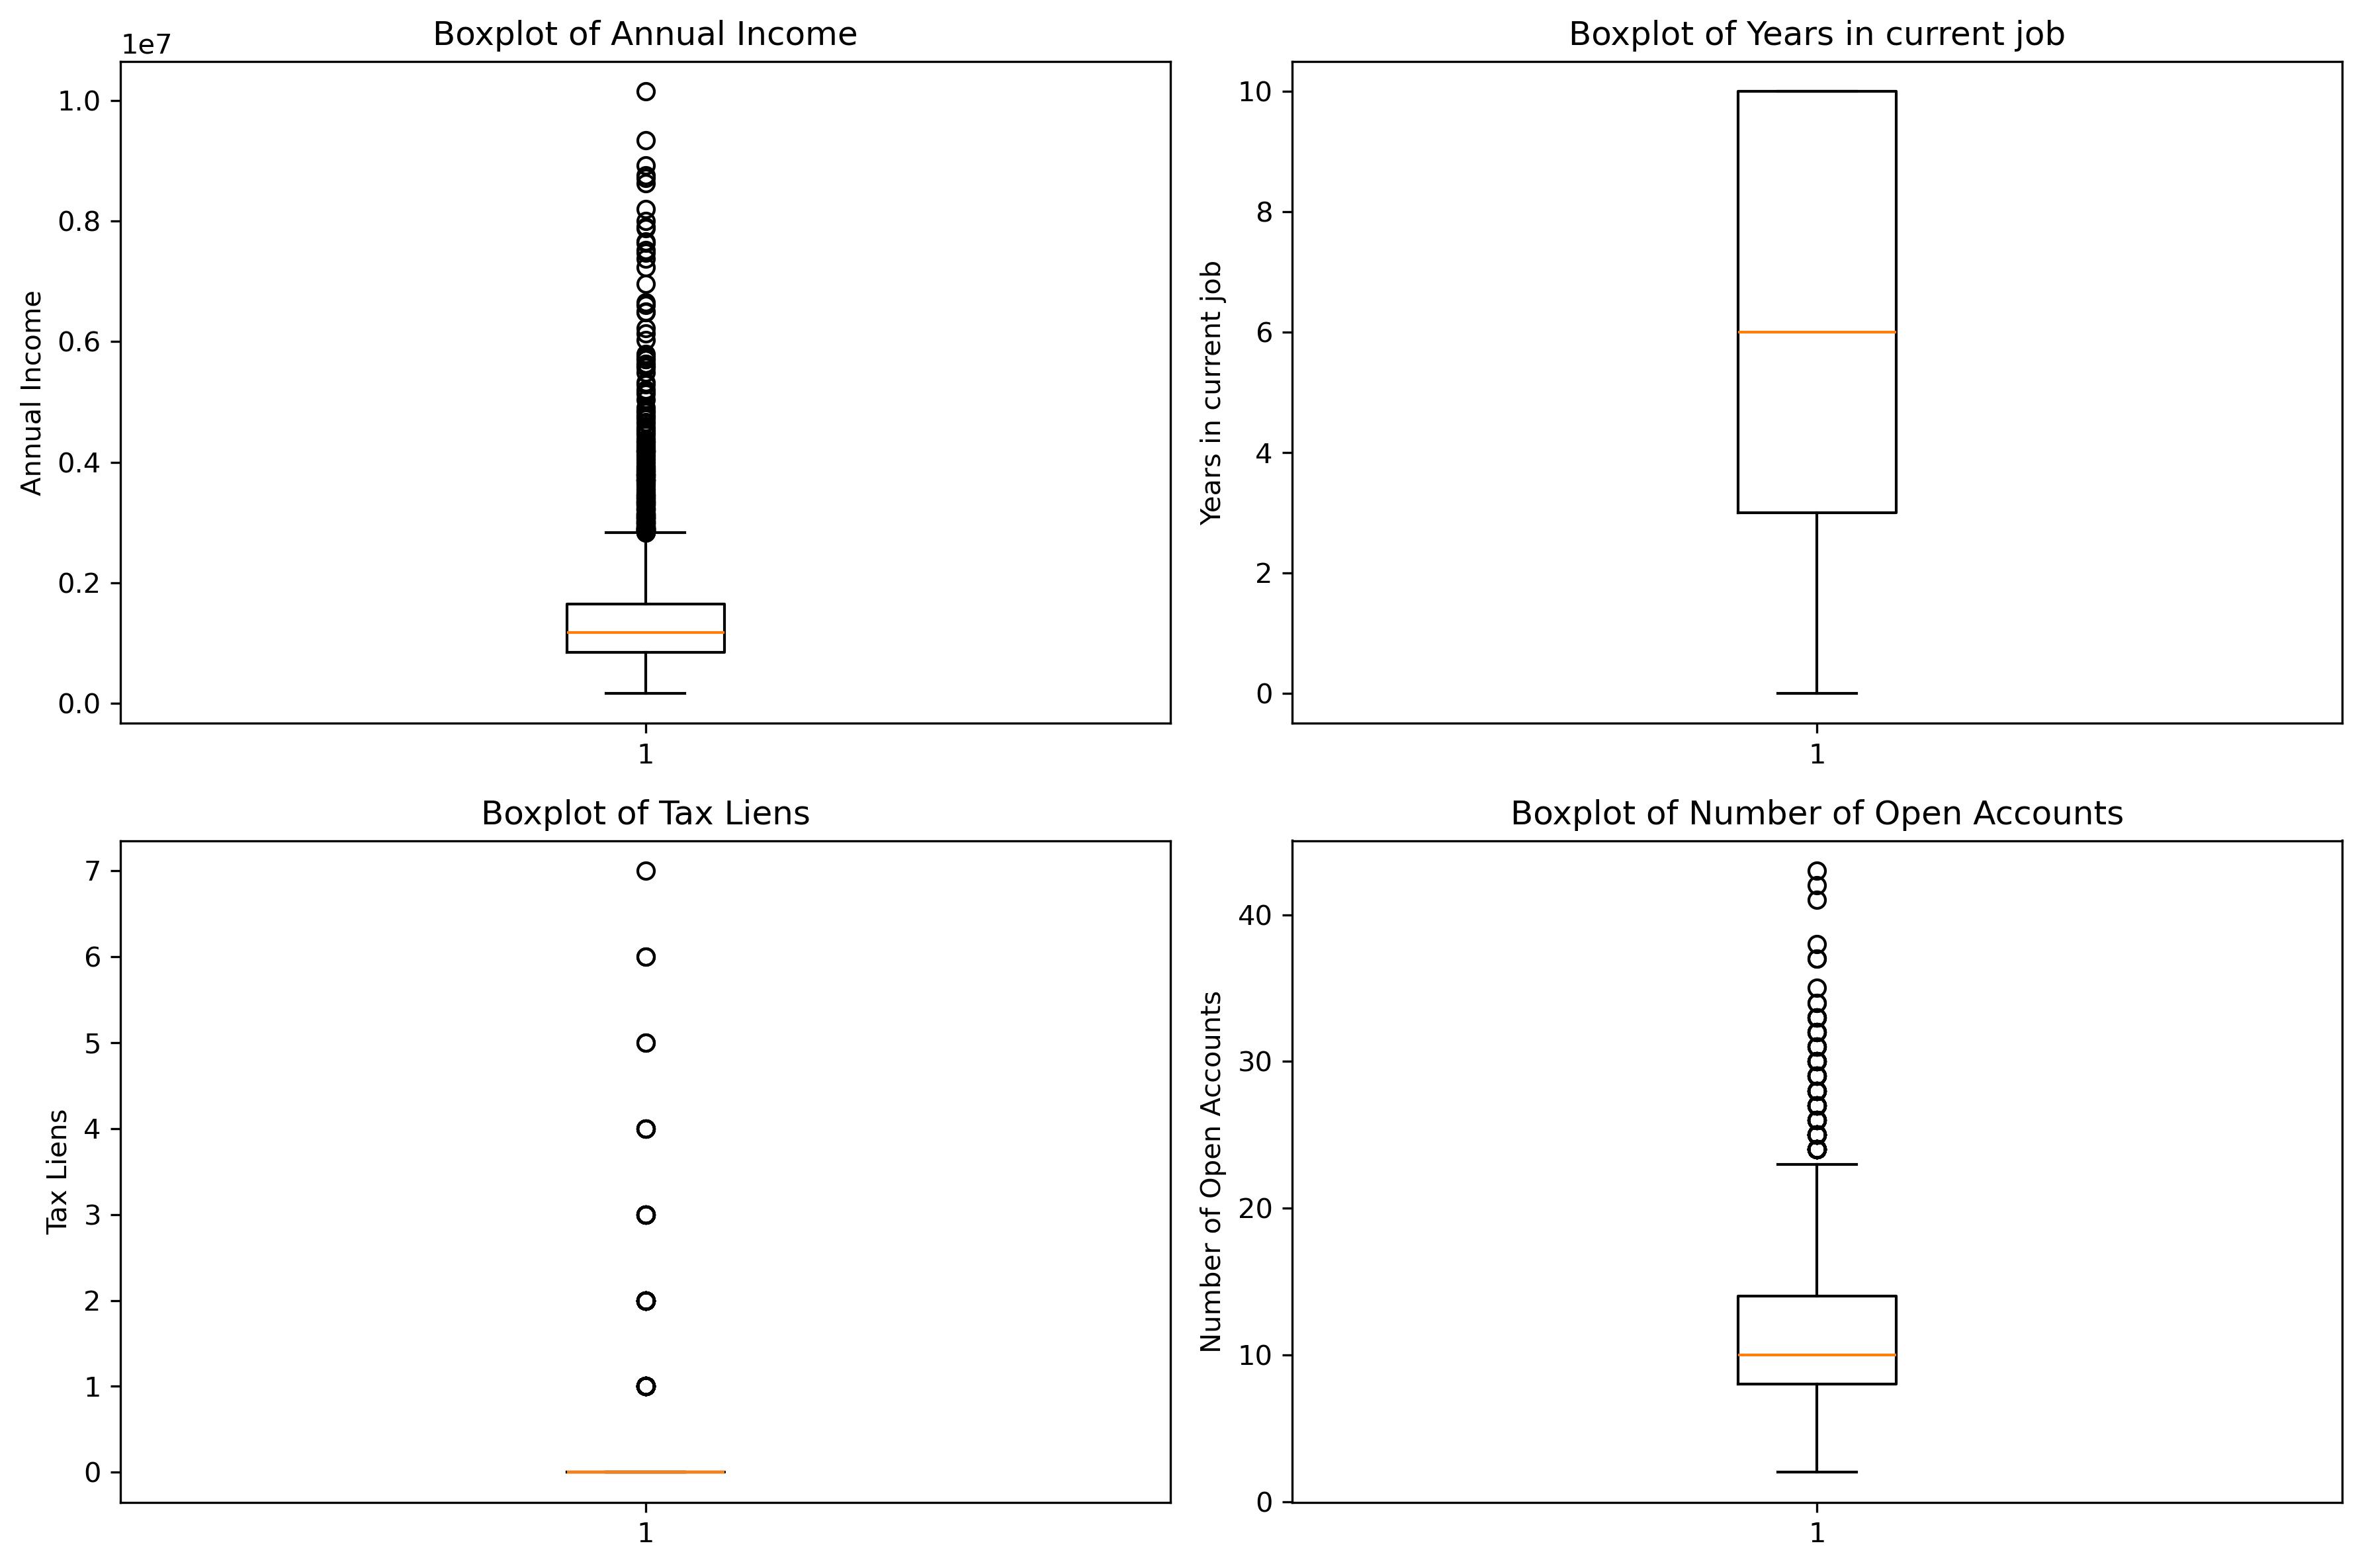

In [11]:
features = ['Annual Income', 'Years in current job', 'Tax Liens', 'Number of Open Accounts']

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i in range(len(features)):
    row = i // 2 
    col = i % 2 
    feature = features[i]
    axes[row, col].boxplot(data[feature].dropna())
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.rcParams['savefig.dpi'] = 300
plt.show()
    

索引 0 对应的特征是: Annual Income
索引 1 对应的特征是: Years in current job
索引 2 对应的特征是: Tax Liens
索引 3 对应的特征是: Number of Open Accounts


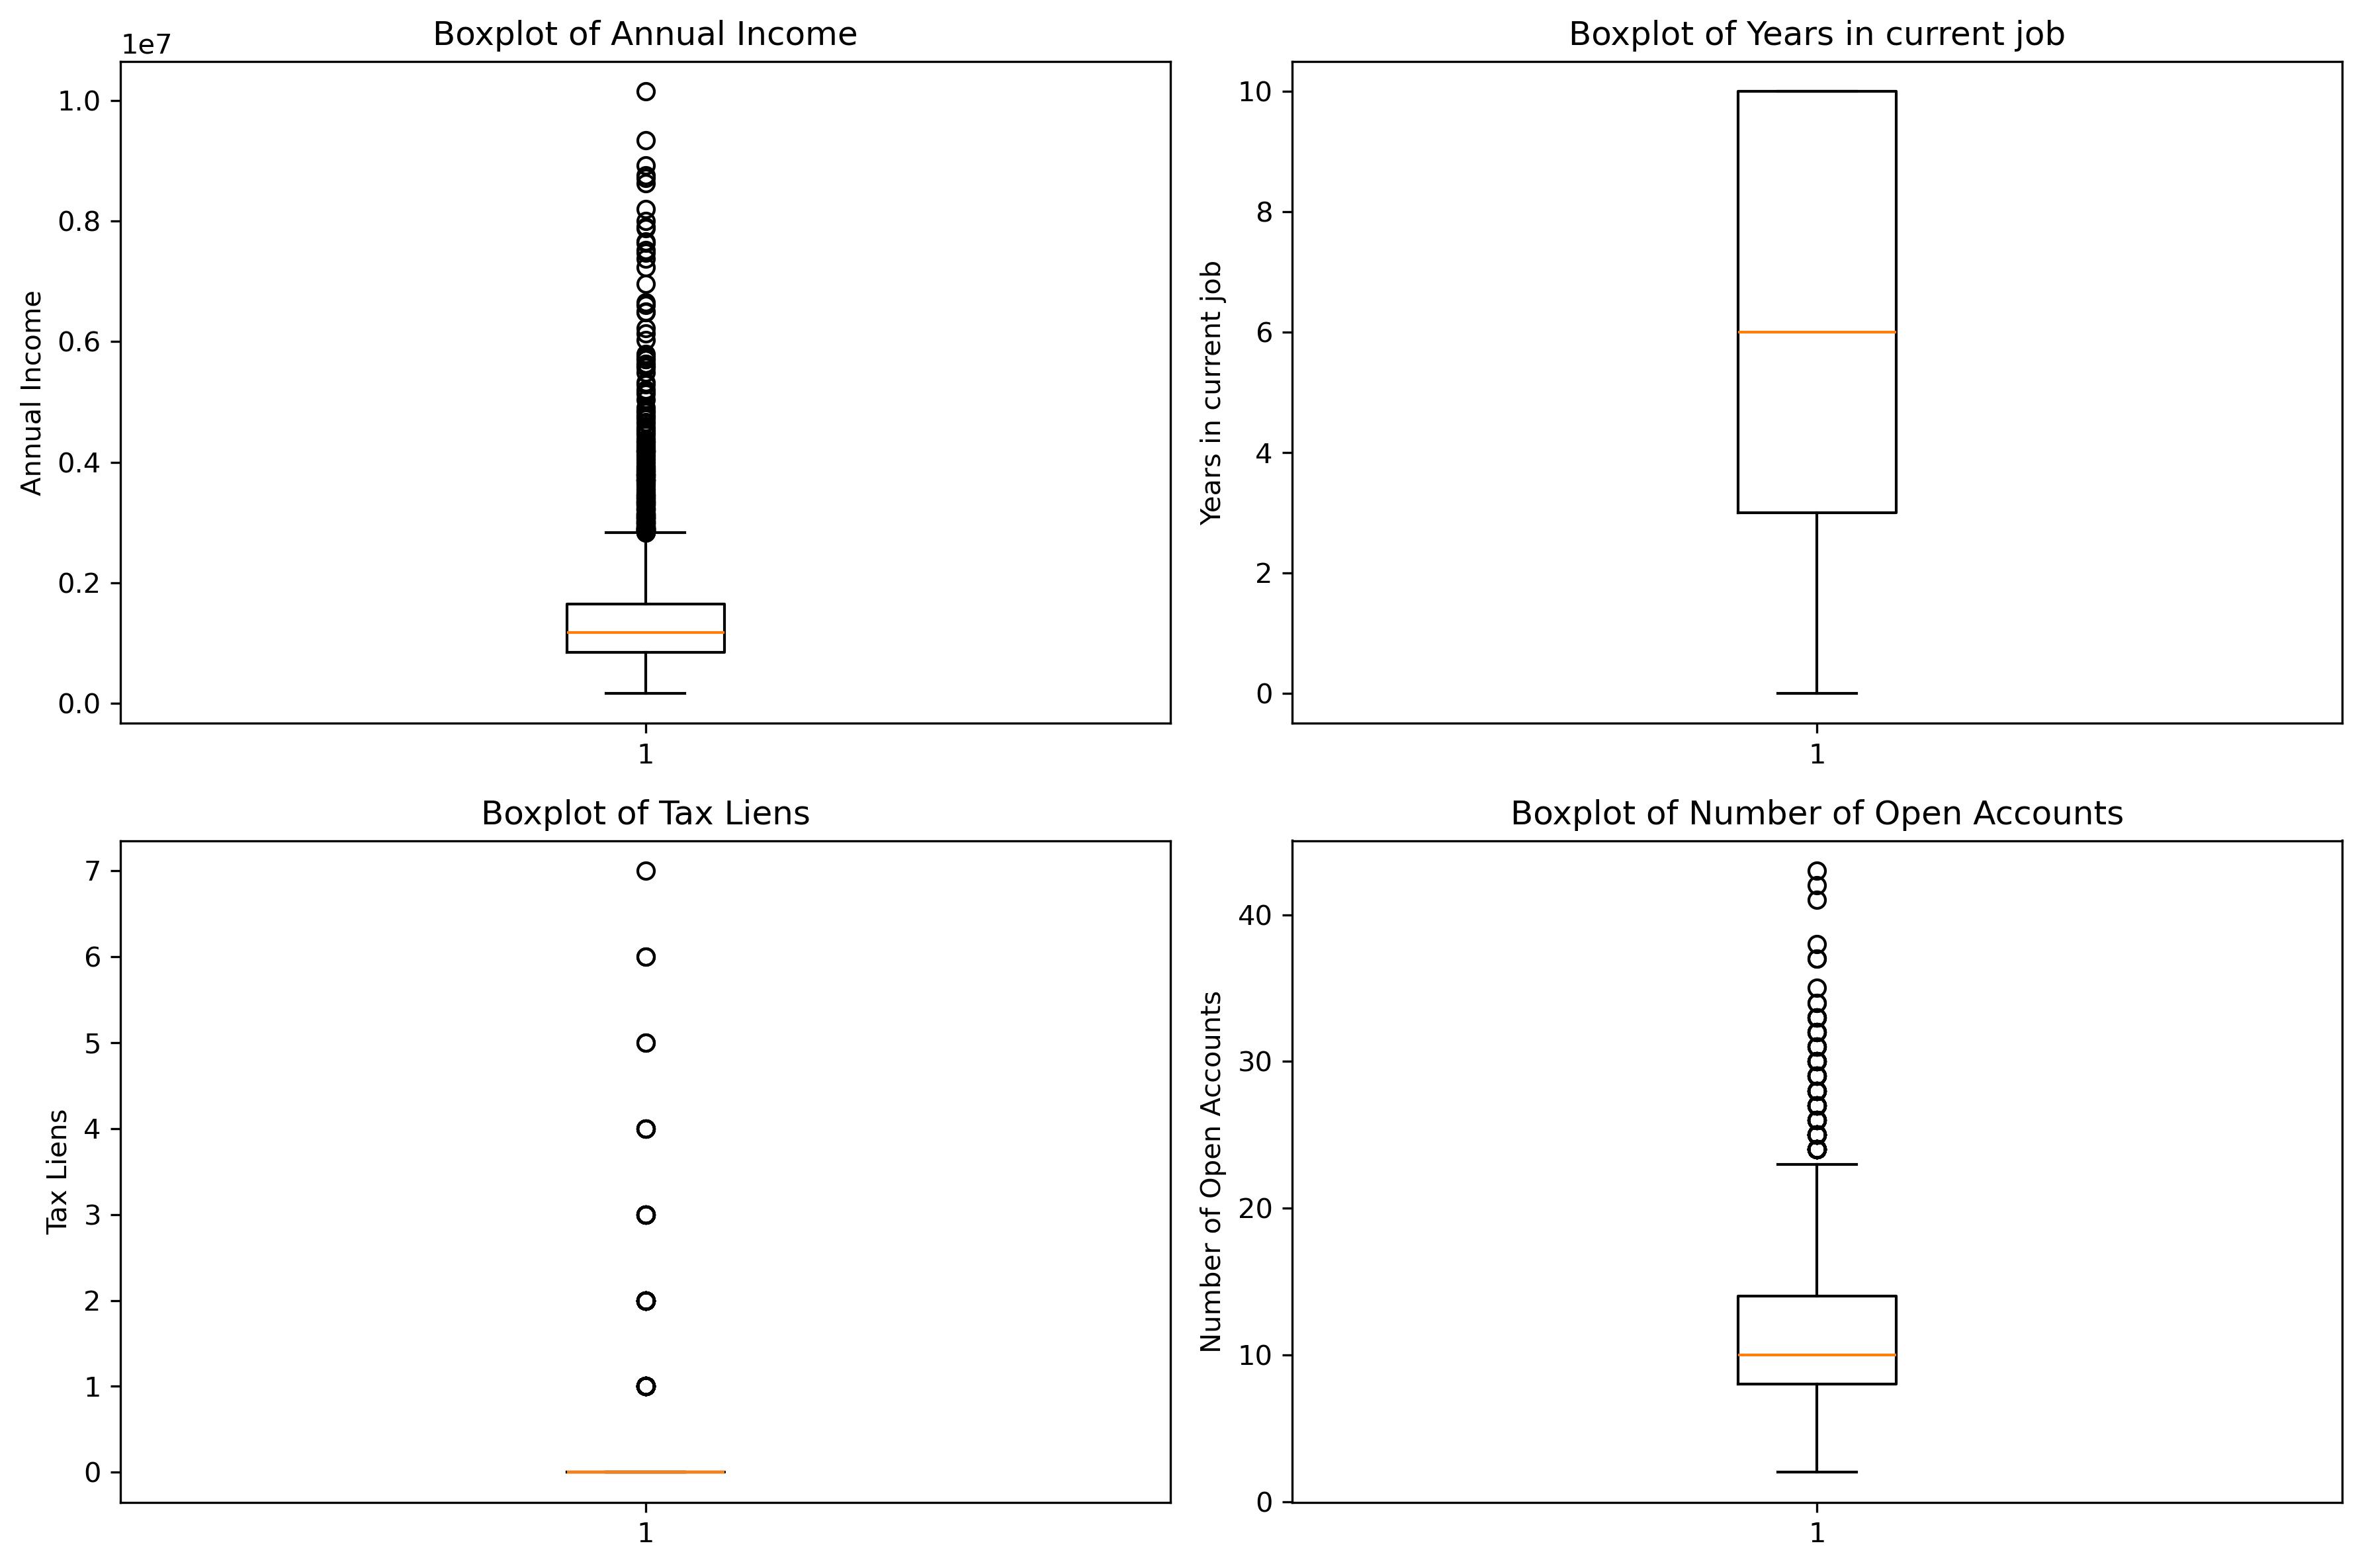

In [13]:
import pandas as pd
features = ['Annual Income', 'Years in current job', 'Tax Liens', 'Number of Open Accounts']
for i, feature in enumerate(features):
    print(f"索引 {i} 对应的特征是: {feature}")
plt.rcParams['figure.dpi'] = 300
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data[feature].dropna())
    axes[row, col].set_title(f'Boxplot of {feature}')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()

plt.show()
    